In [2]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/modified_dataset_converted.csv')
data.head(20)

,ID,deadline,goal,launched,pledged,state,backers,main_category _Art,main_category _Comics,main_category _Crafts,...,main_category _Fashion,main_category _Film & Video,main_category _Food,main_category _Games,main_category _Journalism,main_category _Music,main_category _Photography,main_category _Publishing,main_category _Technology,main_category _Theater
0,1000002330,1444390560,1000,1439295148,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000004038,1361838050,45000,1357950050,220,0,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1000007540,1334550251,5000,1331954651,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1000014025,1459517907,50000,1456493907,24993,1,224,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1000023410,1419186644,1000,1417458644,1205,1,16,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1000030581,1458241512,25000,1454357112,453,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,100004721,1381342777,2500,1378750777,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,100005484,1365403378,12500,1362811378,12700,1,100,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1000055792,1412269910,5000,1409677910,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1000056157,1458943272,85000,1455058872,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
data.describe()

,ID,deadline,goal,launched,pledged,state,backers,main_category _Art,main_category _Comics,main_category _Crafts,...,main_category _Fashion,main_category _Film & Video,main_category _Food,main_category _Games,main_category _Journalism,main_category _Music,main_category _Photography,main_category _Publishing,main_category _Technology,main_category _Theater
count,2.813020e+05,2.813020e+05,281302.000000,2.813020e+05,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,...,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000,281302.000000
mean,1.074933e+09,1.397494e+09,13913.793126,1.394542e+09,3881.387871,0.401991,111.984149,0.077305,0.028101,0.022399,...,0.056203,0.181502,0.067038,0.079623,0.012535,0.145594,0.030736,0.107269,0.076107,0.033157
std,6.194495e+08,5.273788e+07,20783.641331,5.293974e+07,6725.328959,0.490301,997.224466,0.267075,0.165263,0.147979,...,0.230314,0.385435,0.250089,0.270709,0.111254,0.352700,0.172601,0.309456,0.265169,0.179046
min,5.971000e+03,1.241341e+09,0.000000,1.240348e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.372773e+08,1.356571e+09,2000.000000,1.353723e+09,39.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.075861e+09,1.407810e+09,5000.000000,1.405118e+09,690.000000,0.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.611407e+09,1.438988e+09,15000.000000,1.436204e+09,4106.750000,1.000000,62.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.147476e+09,1.481018e+09,85000.000000,1.480637e+09,24993.000000,1.000000,219382.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281302 entries, 0 to 281301
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   ID                           281302 non-null  int64
 1   deadline                     281302 non-null  int64
 2   goal                         281302 non-null  int64
 3   launched                     281302 non-null  int64
 4   pledged                      281302 non-null  int64
 5   state                        281302 non-null  int64
 6   backers                      281302 non-null  int64
 7   main_category _Art           281302 non-null  int64
 8   main_category _Comics        281302 non-null  int64
 9   main_category _Crafts        281302 non-null  int64
 10  main_category _Dance         281302 non-null  int64
 11  main_category _Design        281302 non-null  int64
 12  main_category _Fashion       281302 non-null  int64
 13  main_category _Film & Video  

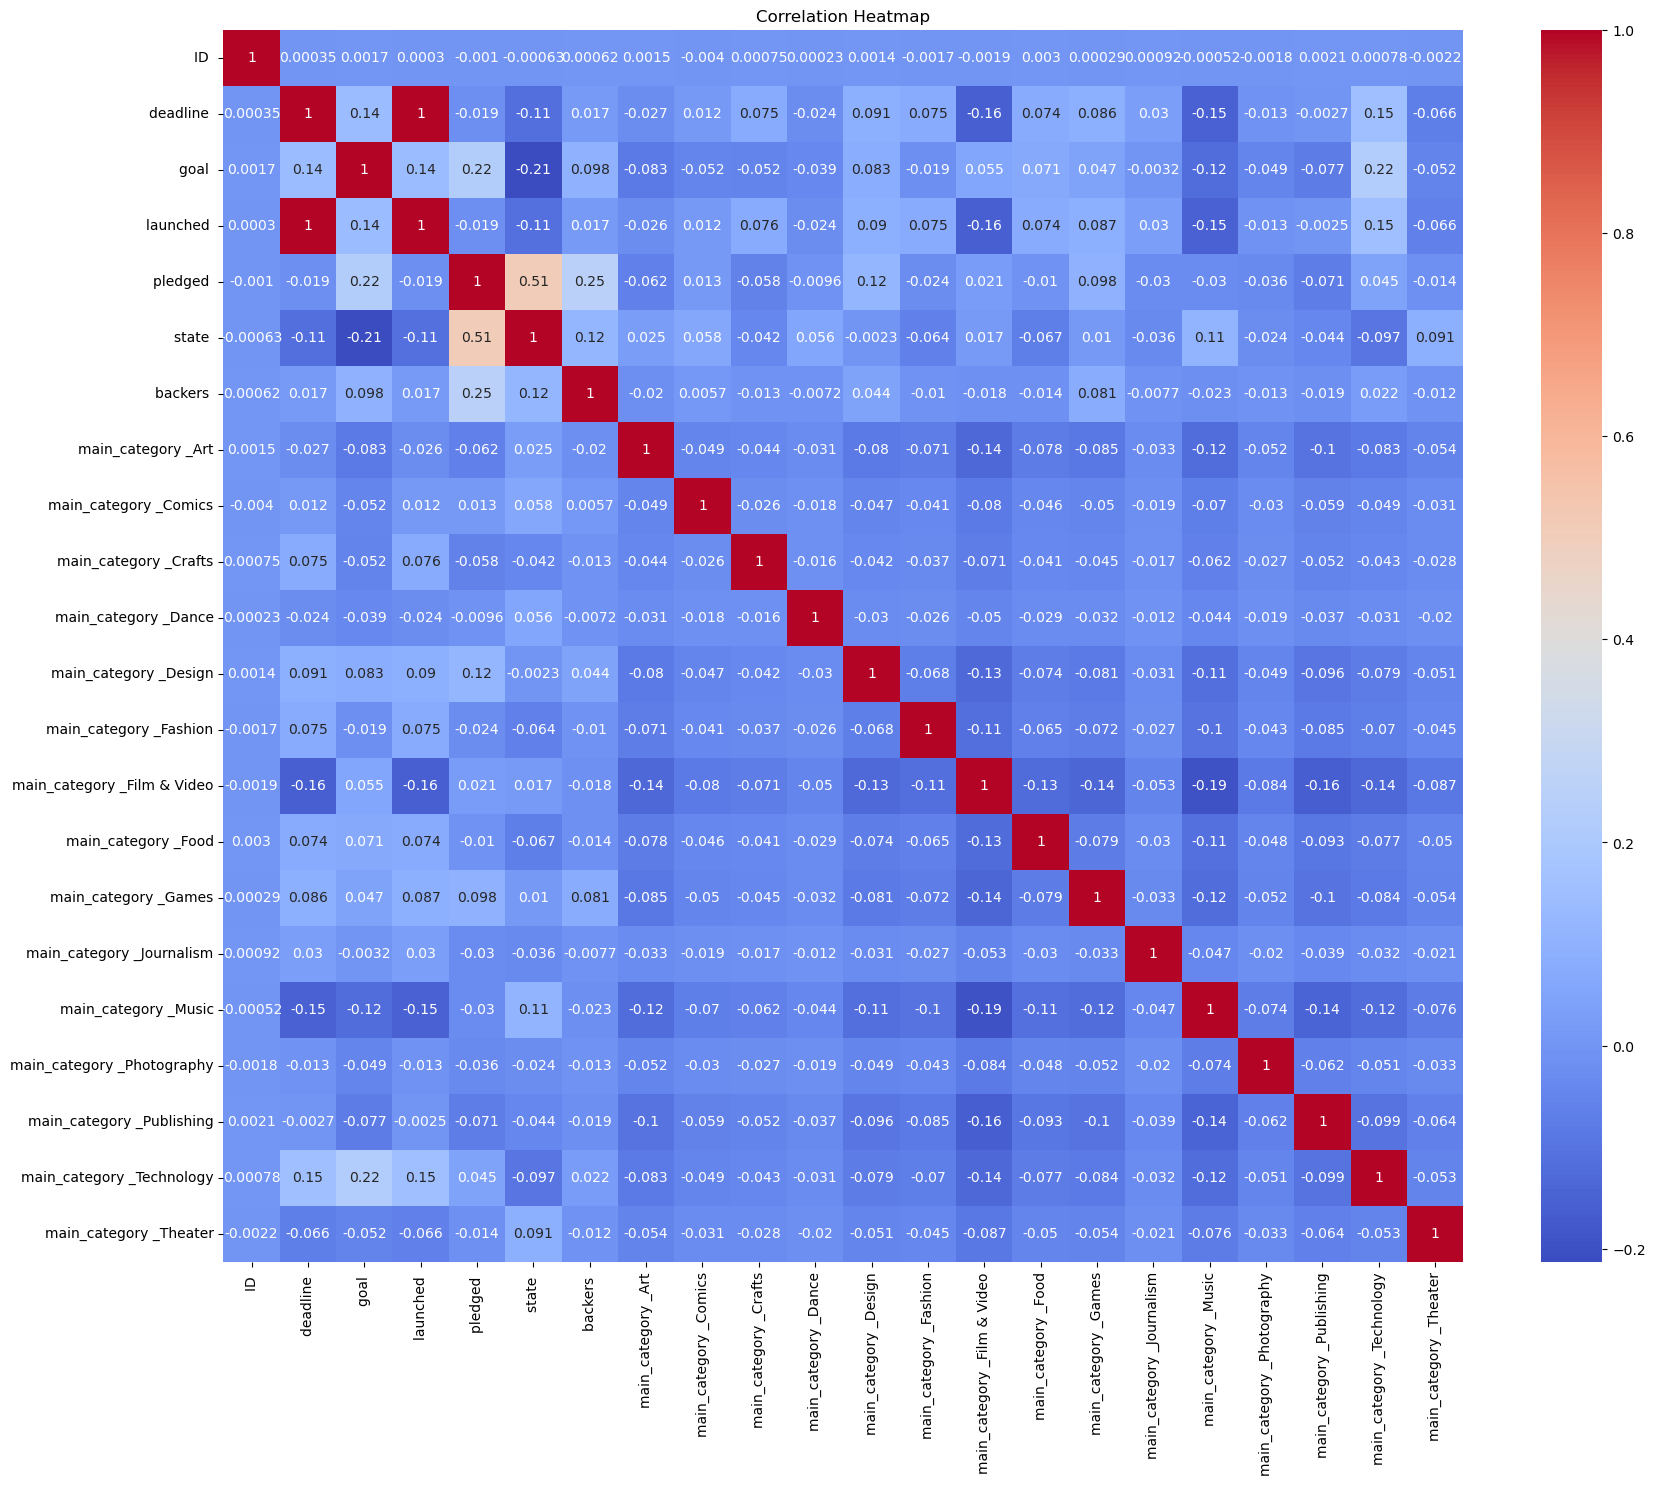

In [5]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

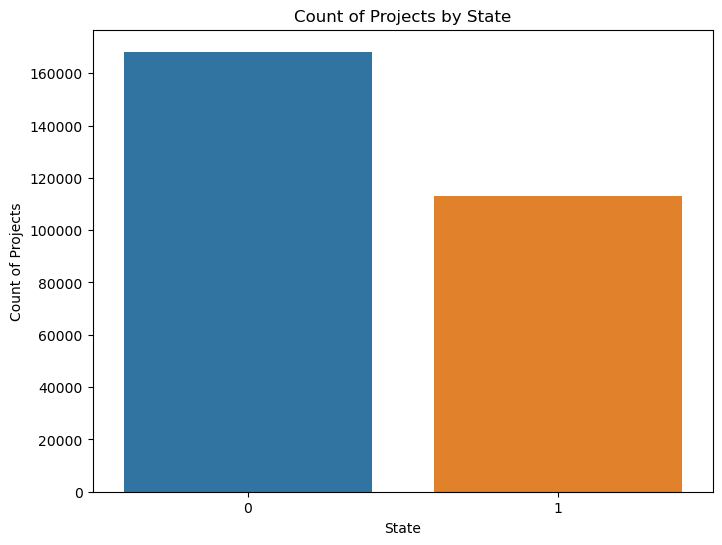

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='state ', data=data)
plt.title('Count of Projects by State')
plt.xlabel('State')
plt.ylabel('Count of Projects')
plt.show()

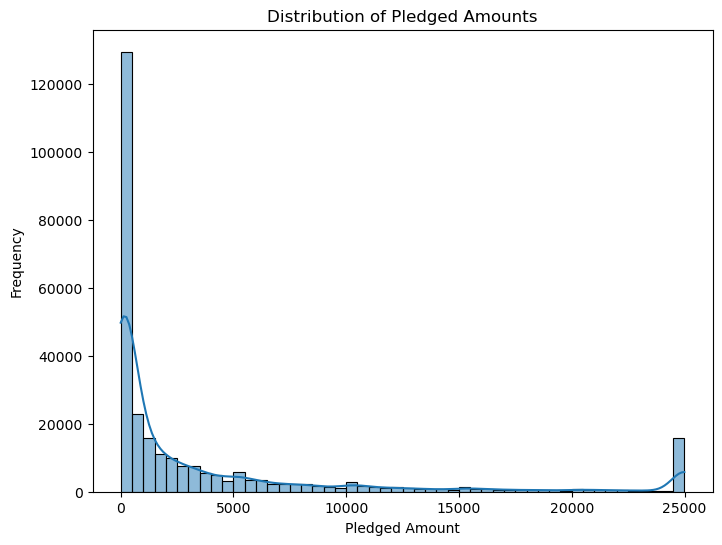

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data['pledged '], bins=50, kde=True)
plt.title('Distribution of Pledged Amounts')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')
plt.show()

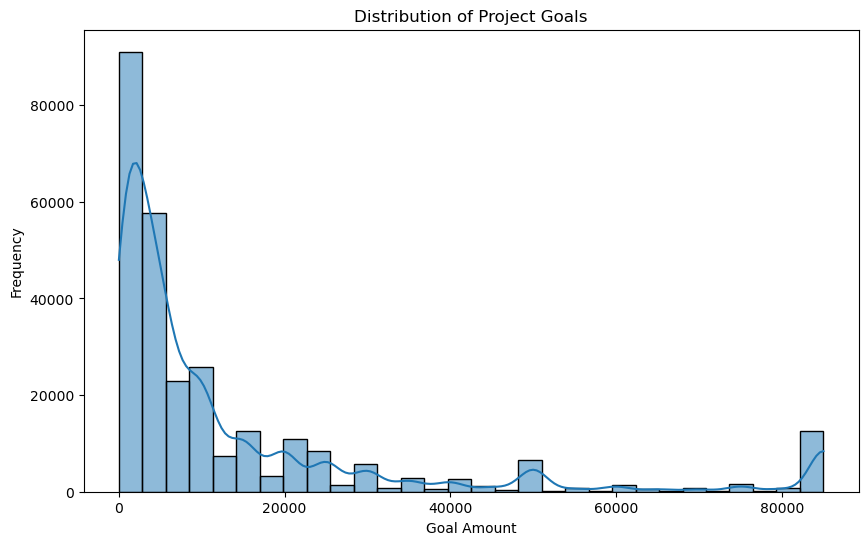

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['goal '], bins=30, kde=True)
plt.title('Distribution of Project Goals')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')
plt.show()

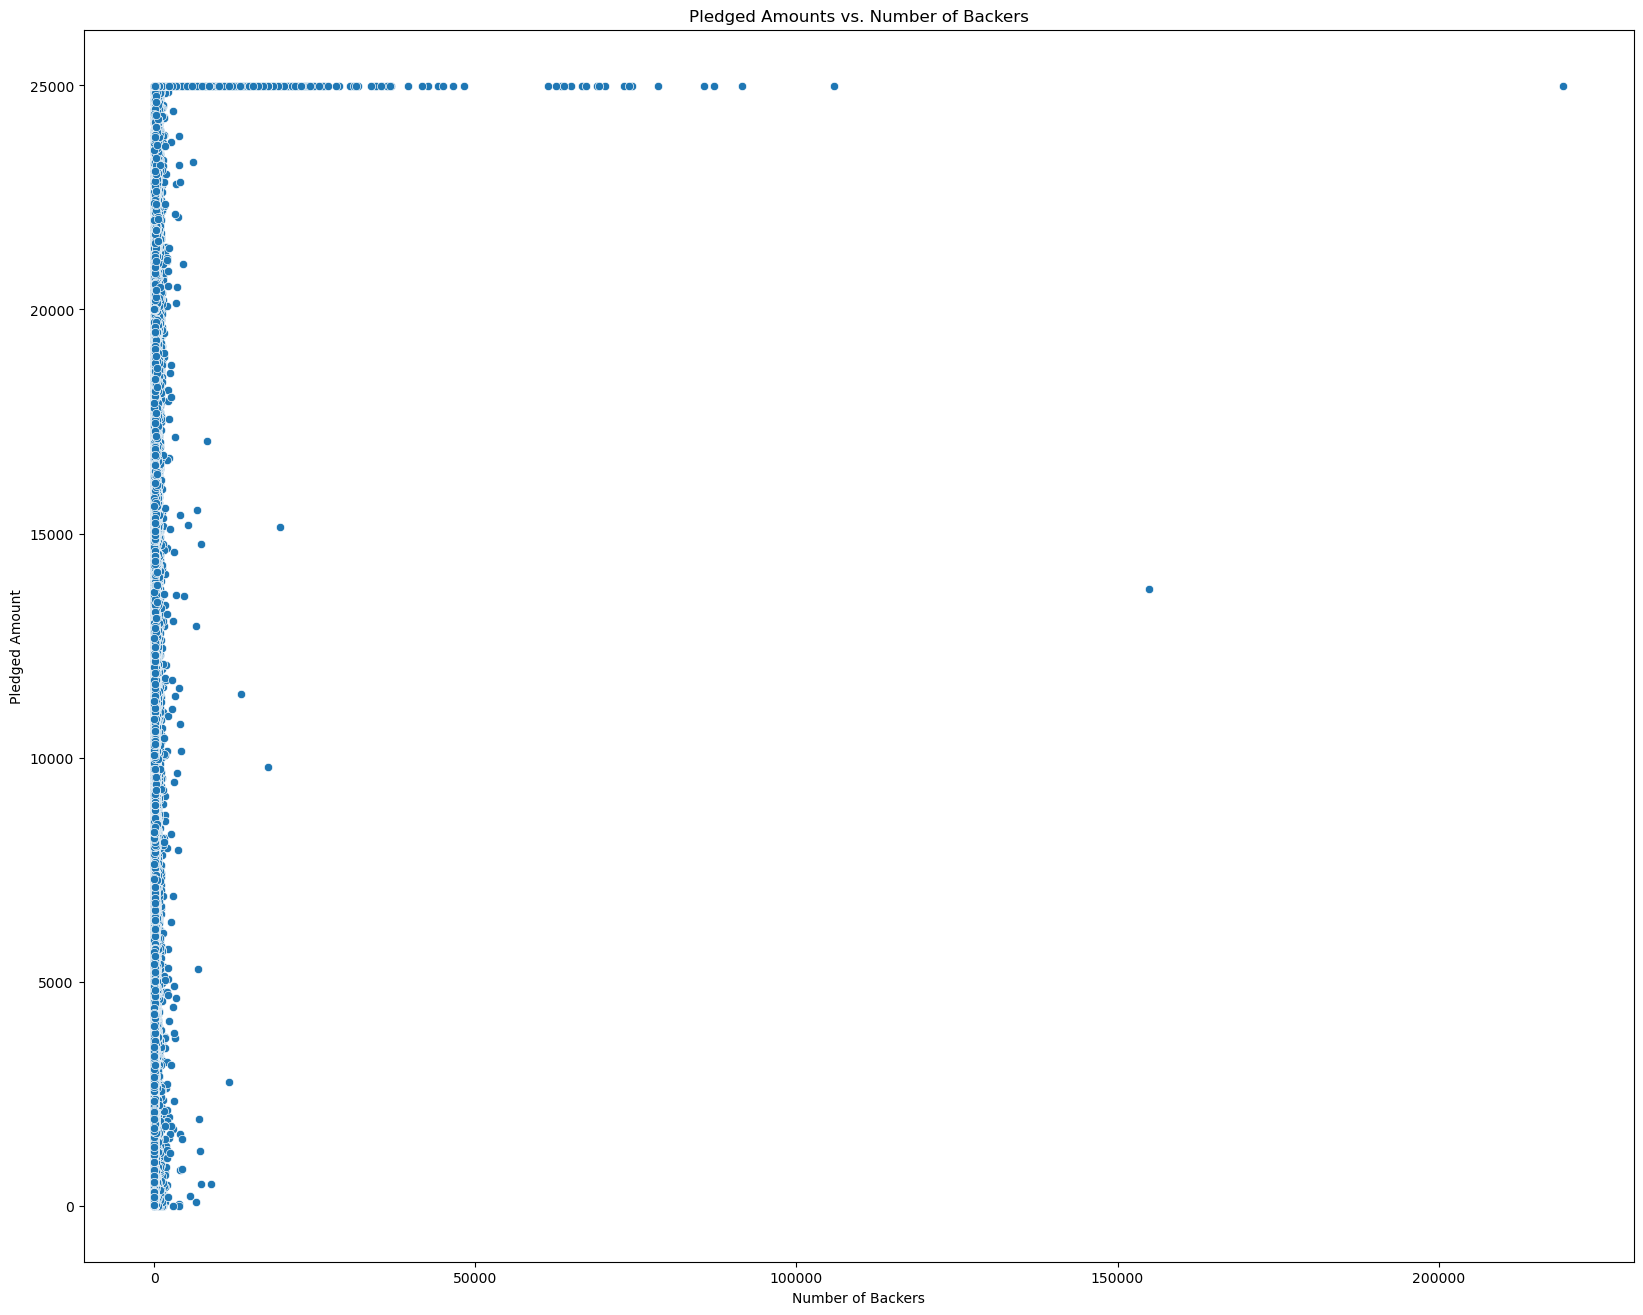

In [9]:
plt.figure(figsize=(20, 16))
sns.scatterplot(x='backers ', y='pledged ', data=data)
plt.title('Pledged Amounts vs. Number of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Pledged Amount')
plt.show()

In [10]:
X = data.drop('state ', axis=1).to_numpy()
X

array([[1000002330, 1444390560,       1000, ...,          1,          0,
                 0],
       [1000004038, 1361838050,      45000, ...,          0,          0,
                 0],
       [1000007540, 1334550251,       5000, ...,          0,          0,
                 0],
       ...,
       [ 999986353, 1281938340,      15000, ...,          0,          0,
                 0],
       [ 999987933, 1455328800,      15000, ...,          0,          1,
                 0],
       [ 999988282, 1313485667,       2000, ...,          0,          0,
                 0]])

In [11]:
y = data.loc[:, 'state '].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [13]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [14]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.990405117270789, 0.6009595514905393, 0.7480289423947931, 0.5995272035690798]


In [15]:
# MODEL 2 - Support Vector Machine
# accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
# accuracy_compare['SVM'] = accuracy
# print ("SVM" , accuracy)

In [16]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.9836531627576404, 0.9909307875894988, 0.9872785637855189, 0.9847851975613657]


<Axes: >

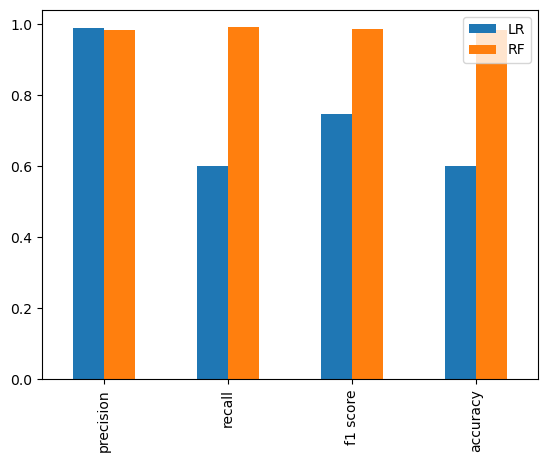

In [17]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [18]:
# corrections and adjustments - use artificial neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [1.0, 0.6002026270418229, 0.7501582823312488, 0.6002026270418229]


/Users/kacper/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

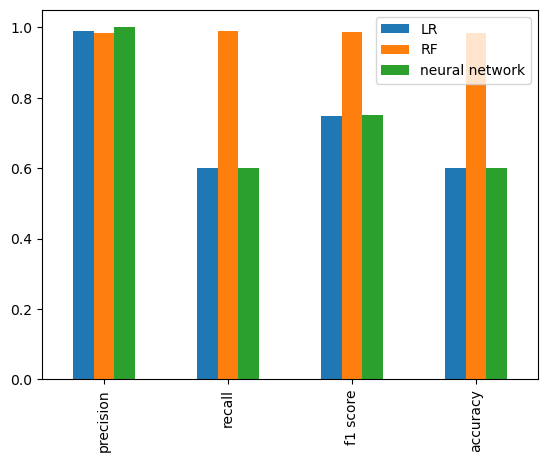

In [19]:
df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')